# Предобработка табличных данных

## 1. Создание датафрейма
* из словаря
* из файла .csv, .xlsx
* из sql-запроса

In [12]:
# импорт
import pandas as pd

In [13]:
# Создание фрейма из словаря
employees = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Carol', 'Frank', 'Eve'],
    'position': ['Senior', 'Middle', 'Lead', 'Junior', 'Middle'],
    'salary': [100000, 99817, 122908, 88123, 93121]
    })

employees

,name,position,salary
0,Alice,Senior,100000
1,Bob,Middle,99817
2,Carol,Lead,122908
3,Frank,Junior,88123
4,Eve,Middle,93121


### Фильтрация датафрейма
* Получить данные о сотрудниках, которых зарплата выше 100000 и их должность Lead

In [18]:
# Способ 1 - через условие внутри индексации

# employees['salary']
# employees['salary'] >= 100000
# employees[employees['salary'] >= 100000]
employees[(employees['salary'] >= 100000) & (employees['position'] == 'Lead')]

,name,position,salary
2,Carol,Lead,122908


In [20]:
# Способ 2 - через запросы

employees.query("salary >= 100000 & position == 'Lead'")

,name,position,salary
2,Carol,Lead,122908


In [46]:
# Способ 3 - через .loc и .iloc

# employees['name'][2:4]
# employees.loc[2:4, 'name']
# employees.iloc[2:4, 0]

mask = employees.iloc[:, 2:3].stack().apply(lambda x: int(x) >= 100000).unstack()
employees[mask.salary]

,name,position,salary
0,Alice,Senior,100000
2,Carol,Lead,122908


In [47]:
# Загрузка данных из csv-файла

data = pd.read_csv('acs2015_census_tract_data.csv.gz')
data.head()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


In [ ]:
data.tail()

### Задача 2
* Вывести список штатов, в которых процент темнокожего населения и уровень безработицы больше 50% 

In [49]:
data.shape

(74001, 37)

In [52]:
data['Black'].describe()
# data['Black'].mean()

count    73311.000000
mean        13.272581
std         21.762483
min          0.000000
25%          0.700000
50%          3.700000
75%         14.400000
max        100.000000
Name: Black, dtype: float64

In [53]:
data.columns

Index(['CensusTract', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [57]:
data['State'].unique()


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [59]:
data['State'].value_counts().head(10)

California        8057
Texas             5265
New York          4918
Florida           4245
Pennsylvania      3218
Illinois          3123
Ohio              2952
Michigan          2813
North Carolina    2195
New Jersey        2010
Name: State, dtype: int64

In [65]:
# data[['State', 'Black', 'Unemployment']].head()

data[(data['Black'] > 50) & (data['Unemployment'] > 50)]['State'].unique()

array(['District of Columbia', 'Florida', 'Georgia', 'Illinois',
       'Michigan', 'New York', 'Ohio', 'Pennsylvania', 'Texas'],
      dtype=object)

<Axes: ylabel='Frequency'>

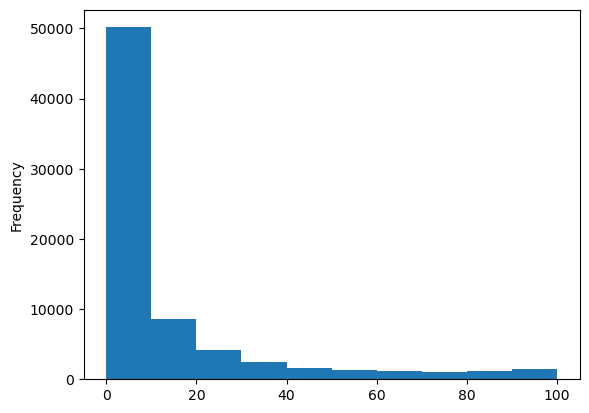

In [66]:
data['Black'].plot.hist()